# **torchxai.erf**

In [1]:
import torchxai as tx

import torch
from torchvision import models, datasets, transforms
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## **datasets**

In [2]:
transform = transforms.Compose([transforms.Resize((64, 64))])
dataset = datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)

# take subset for testing 
train_indices = [i for i in range(100)]
dataset = torch.utils.data.Subset(dataset, train_indices)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=False, num_workers=0)

Files already downloaded and verified


## **models**

In [3]:
device = torch.device("cpu")

model = models.resnet18(pretrained=True)
model = model.to(device)

c:\Users\jimmy\miniconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jimmy\miniconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## **Effective Receptive Field (ERF)**

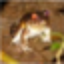

In [5]:
image = dataset[0][0]
image

In [6]:

image = np.array(image)
hook_layers = [
    model.layer2[0].conv1,
    model.layer3[0].conv1
]

heatmap = tx.erf.ERF(model, image, device, hook_layers)
heatmap

array([[[0.00028295, 0.00068729, 0.00205773, ..., 0.0001945 ,
         0.00066295, 0.00022155],
        [0.00061943, 0.00056298, 0.00110979, ..., 0.00042747,
         0.00017451, 0.00019235],
        [0.00063722, 0.00182394, 0.00045684, ..., 0.00013855,
         0.00042741, 0.00042296],
        ...,
        [0.00177953, 0.0004871 , 0.00032634, ..., 0.00057135,
         0.00017636, 0.00011506],
        [0.00111444, 0.00030444, 0.00180016, ..., 0.00041252,
         0.00014626, 0.00013374],
        [0.00139295, 0.00153659, 0.00036193, ..., 0.00045008,
         0.00018187, 0.00022792]],

       [[0.0013199 , 0.00520181, 0.00519931, ..., 0.00074146,
         0.00163252, 0.0005531 ],
        [0.00559694, 0.00192257, 0.0081118 , ..., 0.00096331,
         0.0011247 , 0.00205518],
        [0.00521724, 0.0001962 , 0.00024119, ..., 0.001533  ,
         0.00093557, 0.00277733],
        ...,
        [0.00127367, 0.0031918 , 0.00169778, ..., 0.00242011,
         0.00119062, 0.00117072],
        [0.0

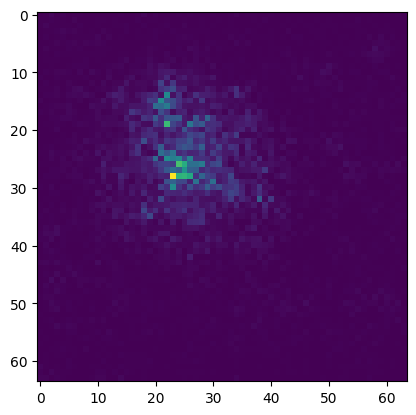

In [7]:
tx.erf.visualize(heatmap[0])